# Extracción de los datos

Inicialmente se importaron los archivos `.xlsx` descargados del sitio de Estadísticas de la UDG, y se renombraron para que pudiera ser más fácil su importación.

Posteriormente se hizo un proceso de estandarización de la nomenclatura de las filas y columnas para que fueran consistentes entre los diferentes archivos, ya que algunas veces las carreras eran nombradas de una forma y en algunos archivos aparecían con un nombre ligeramente distinto o utilizando abreviaciones.

In [2]:
# Importación de las librerías
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from sklearn import linear_model

El primer conjunto de datos que analizaremos es el correspondiente a los puntajes mínimos requeridos para ingresar a estas dos carreras en la UDG.

In [3]:
puntaje_minimo_df = pd.DataFrame()

In [4]:
for f in glob.glob('datos_udg/Puntajes_minimos_CUs_20*.xlsx'):
    df = pd.read_excel(f, header=1, usecols=[0,1,3,8])
    df.set_index(['CENTRO', 'CARRERA'], inplace=True)
    puntaje_minimo_df = puntaje_minimo_df.append(df)

In [5]:
puntaje_minimo_df

ADMITIDOS  \
CENTRO CARRERA                                                         
CUAAD  LICENCIATURA EN ARQUITECTURA                              211   
       LICENCIATURA EN DISEÑO DE INTERIORES Y AMBIENTA...         70   
       LICENCIATURA EN DISEÑO DE MODAS                            40   
       LICENCIATURA EN DISEÑO INDUSTRIAL                          75   
       LICENCIATURA EN DISEÑO PARA LA COMUNICACION GRA...        167   
...                                                              ...   
SUV    LICENCIATURA EN BIBLIOTECOLOGIA Y GESTION DEL C...         14   
       LICENCIATURA EN DESARROLLO EDUCATIVO                      135   
       LICENCIATURA EN SEGURIDAD CIUDADANA                        38   
       LICENCIATURA EN TECNOLOGIAS E INFORMACION                 133   
NaN    TOTAL CU's                                              17530   

                                                          PUNTAJE MINIMO  
CENTRO CARRERA                                                            
CUAAD  LICENCIATURA EN ARQUITECTURA                              159.053  
       LICENCIATURA EN DISEÑO DE INTERIORES Y AMBIENTA...        148.819  
       LICENCIATURA EN DISEÑO DE MODAS                           143.556  
       LICENCIATURA EN DISEÑO INDUSTRIAL                         156.847  
       LICENCIATURA EN DISEÑO PARA LA COMUNICACION GRA...        138.177  
...                                                                  ...  
SUV    LICENCIATURA EN BIBLIOTECOLOGIA Y GESTION DEL C...             60  
       LICENCIATURA EN DESARROLLO EDUCATIVO                           60  
       LICENCIATURA EN SEGURIDAD CIUDADANA                            60  
       LICENCIATURA EN TECNOLOGIAS E INFORMACION                      60  
NaN    TOTAL CU's                                                    NaN  

[4205 rows x 2 columns]

## Análisis Puntajes Mínimos Licenciatura en Ingeniería en Computación

Extraemos el Data Frame correspondiente a la carrera de **Licenciatura en Ingeniería en Computación**

In [6]:
ing_comp_df = puntaje_minimo_df.loc[('CUCEI','LICENCIATURA EN INGENIERIA EN COMPUTACION'),['ADMITIDOS','PUNTAJE MINIMO']]
ing_comp_df

/Users/mariomorales/opt/anaconda2/envs/python3env/lib/python3.6/site-packages/pandas/core/indexing.py:1760: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


ADMITIDOS PUNTAJE MINIMO
CENTRO CARRERA                                                            
CUCEI  LICENCIATURA EN INGENIERIA EN COMPUTACION        196        148.748
       LICENCIATURA EN INGENIERIA EN COMPUTACION        260        152.547
       LICENCIATURA EN INGENIERIA EN COMPUTACION        196        146.341
       LICENCIATURA EN INGENIERIA EN COMPUTACION        170        151.161
       LICENCIATURA EN INGENIERIA EN COMPUTACION        196        145.889
       LICENCIATURA EN INGENIERIA EN COMPUTACION        245         154.99
       LICENCIATURA EN INGENIERIA EN COMPUTACION        196        146.941
       LICENCIATURA EN INGENIERIA EN COMPUTACION        196        146.413
       LICENCIATURA EN INGENIERIA EN COMPUTACION        186        148.769
       LICENCIATURA EN INGENIERIA EN COMPUTACION        170          158.1
       LICENCIATURA EN INGENIERIA EN COMPUTACION        196        155.611
       LICENCIATURA EN INGENIERIA EN COMPUTACION        196        156.523
       LICENCIATURA EN INGENIERIA EN COMPUTACION        200        149.091
       LICENCIATURA EN INGENIERIA EN COMPUTACION        196        161.624
       LICENCIATURA EN INGENIERIA EN COMPUTACION        196        156.453
       LICENCIATURA EN INGENIERIA EN COMPUTACION        170        156.077
       LICENCIATURA EN INGENIERIA EN COMPUTACION        260         140.17
       LICENCIATURA EN INGENIERIA EN COMPUTACION        245        139.267
       LICENCIATURA EN INGENIERIA EN COMPUTACION        196         154.42
       LICENCIATURA EN INGENIERIA EN COMPUTACION        200        156.857

In [7]:
ing_comp_df[['ADMITIDOS','PUNTAJE MINIMO']].astype(int).describe()

,ADMITIDOS,PUNTAJE MINIMO
count,20.000000,20.000000
mean,203.300000,150.800000
std,27.230208,5.987707
min,170.000000,139.000000
25%,196.000000,146.000000
50%,196.000000,151.500000
75%,200.000000,156.000000
max,260.000000,161.000000


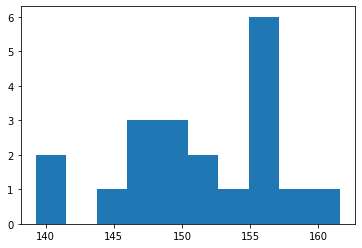

In [8]:
plt.hist(ing_comp_df['PUNTAJE MINIMO'], bins=10)
plt.show()

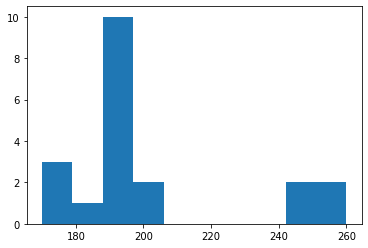

In [28]:
plt.hist(ing_comp_df['ADMITIDOS'], bins=10)
plt.show()

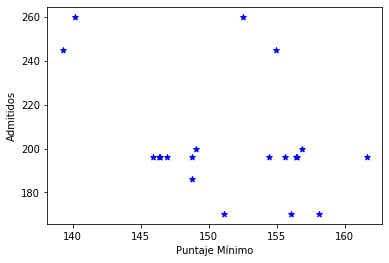

In [19]:
plt.xlabel('Puntaje Mínimo')
plt.ylabel('Admitidos')
plt.scatter(ing_comp_df[['PUNTAJE MINIMO']],ing_comp_df[['ADMITIDOS']],color='blue', marker='*')

In [20]:
Reg = linear_model.LinearRegression()
Reg.fit(ing_comp_df[['PUNTAJE MINIMO']],ing_comp_df[['ADMITIDOS']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
Reg.predict([[150]])

array([[205.75879491]])

In [22]:
Reg.coef_

array([[-1.89199196]])

In [23]:
Reg.intercept_

array([489.55758923])

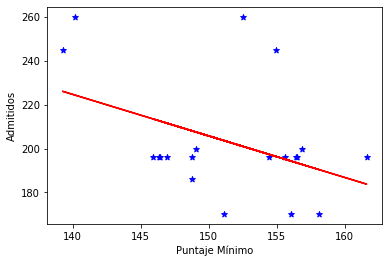

In [24]:
plt.xlabel('Puntaje Mínimo')
plt.ylabel('Admitidos')
plt.scatter(ing_comp_df[['PUNTAJE MINIMO']],ing_comp_df[['ADMITIDOS']], color = 'blue', marker = '*')
plt.plot(ing_comp_df[['PUNTAJE MINIMO']], Reg.predict(ing_comp_df[['PUNTAJE MINIMO']]), color = 'red')

In [25]:
pred_admitidos_df = pd.read_excel("lista_puntajes.xlsx")
pred_admitidos_df.head()

,Puntaje Minimo
0,120
1,121
2,122
3,123
4,124


In [26]:
P = Reg.predict(pred_admitidos_df)

In [27]:
pred_admitidos_df['Admitidos'] = P
pred_admitidos_df

,Puntaje Minimo,Admitidos
0,120,262.518554
1,121,260.626562
2,122,258.734570
3,123,256.842578
4,124,254.950586
...,...,...
76,196,118.727165
77,197,116.835173
78,198,114.943181
79,199,113.051189


## Análisis Puntajes Mínimos Licenciatura en Informática

Extraemos el Data Frame correspondiente a la carrera de Licenciatura en Informática

In [29]:
lic_inf_df = puntaje_minimo_df.loc[('CUCEI','LICENCIATURA EN INFORMATICA'),['ADMITIDOS','PUNTAJE MINIMO']]
lic_inf_df

/Users/mariomorales/opt/anaconda2/envs/python3env/lib/python3.6/site-packages/pandas/core/indexing.py:1760: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


ADMITIDOS PUNTAJE MINIMO
CENTRO CARRERA                                              
CUCEI  LICENCIATURA EN INFORMATICA        186        138.769
       LICENCIATURA EN INFORMATICA        225        152.787
       LICENCIATURA EN INFORMATICA        186        128.899
       LICENCIATURA EN INFORMATICA        170        132.019
       LICENCIATURA EN INFORMATICA        186        113.602
       LICENCIATURA EN INFORMATICA        186        149.293
       LICENCIATURA EN INFORMATICA        186         120.71
       LICENCIATURA EN INFORMATICA        186        133.389
       LICENCIATURA EN INFORMATICA        181        123.733
       LICENCIATURA EN INFORMATICA        170        134.444
       LICENCIATURA EN INFORMATICA        186        134.226
       LICENCIATURA EN INFORMATICA        186        145.569
       LICENCIATURA EN INFORMATICA        186        142.974
       LICENCIATURA EN INFORMATICA        186        140.611
       LICENCIATURA EN INFORMATICA        186        132.693
       LICENCIATURA EN INFORMATICA        170        134.543
       LICENCIATURA EN INFORMATICA        225          144.7
       LICENCIATURA EN INFORMATICA        188        142.167
       LICENCIATURA EN INFORMATICA        186        145.167
       LICENCIATURA EN INFORMATICA        186        149.211

In [30]:
lic_inf_df[['ADMITIDOS','PUNTAJE MINIMO']].astype(int).describe()

,ADMITIDOS,PUNTAJE MINIMO
count,20.00000,20.000000
mean,187.35000,136.450000
std,14.14688,10.205649
min,170.00000,113.000000
25%,186.00000,132.000000
50%,186.00000,136.000000
75%,186.00000,144.250000
max,225.00000,152.000000


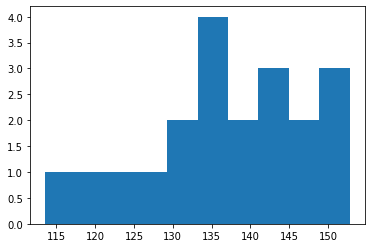

In [31]:
plt.hist(lic_inf_df['PUNTAJE MINIMO'], bins=10)
plt.show()

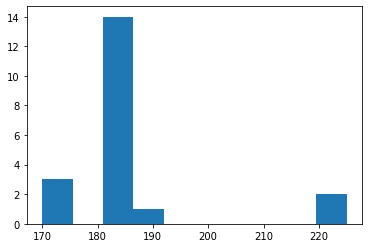

In [32]:
plt.hist(lic_inf_df['ADMITIDOS'], bins=10)
plt.show()

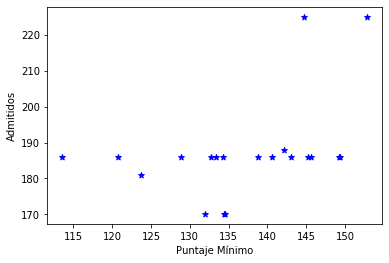

In [33]:
plt.xlabel('Puntaje Mínimo')
plt.ylabel('Admitidos')
plt.scatter(lic_inf_df[['PUNTAJE MINIMO']],lic_inf_df[['ADMITIDOS']],color='blue', marker='*')

In [34]:
Reg = linear_model.LinearRegression()
Reg.fit(lic_inf_df[['PUNTAJE MINIMO']],lic_inf_df[['ADMITIDOS']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
Reg.predict([[135]])

array([[186.18689933]])

In [36]:
Reg.coef_

array([[0.58881186]])

In [37]:
Reg.intercept_

array([106.69729839])

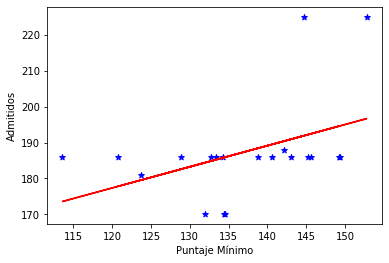

In [38]:
plt.xlabel('Puntaje Mínimo')
plt.ylabel('Admitidos')
plt.scatter(lic_inf_df[['PUNTAJE MINIMO']],lic_inf_df[['ADMITIDOS']], color = 'blue', marker = '*')
plt.plot(lic_inf_df[['PUNTAJE MINIMO']], Reg.predict(lic_inf_df[['PUNTAJE MINIMO']]), color = 'red')

In [39]:
pred_admitidos_df = pd.read_excel("lista_puntajes.xlsx")
pred_admitidos_df.head()

,Puntaje Minimo
0,120
1,121
2,122
3,123
4,124


In [40]:
P = Reg.predict(pred_admitidos_df)

In [41]:
pred_admitidos_df['Admitidos'] = P
pred_admitidos_df

,Puntaje Minimo,Admitidos
0,120,177.354721
1,121,177.943533
2,122,178.532345
3,123,179.121157
4,124,179.709969
...,...,...
76,196,222.104423
77,197,222.693235
78,198,223.282046
79,199,223.870858


## Análisis por procedencia escolar

A continuación analizaremos los datos por procedencia escolar para cada carrera

In [42]:
# Obtención del Data Frame
procedencia_escolar_df = pd.DataFrame()

In [44]:
for g in glob.glob('datos_udg/Admitidos_por_procedencia_escolar_20*.xlsx'):
    new_df = pd.read_excel(g, header=1, sheet_name="CUCEI", usecols=[*range(3,26)])
    new_df.set_index(['CARRERA'], inplace=True)
    procedencia_escolar_df = procedencia_escolar_df.append(new_df)

In [45]:
procedencia_escolar_df

,Total admitidos primer ingreso,Extranjeros,Incorporadas UDG,Oficial UDG,Particulares Jalisco,Particulares Zona Metropolitana de Guadalajara,Particulares Otros Estados,Públicas Jalisco,Públicas Zona Metropolitana de Guadalajara,Públicas Otros Estados,...,Incorporadas UDG.1,Oficial UDG.1,Particulares Jalisco.1,Particulares Zona Metropolitana de Guadalajara.1,Particulares Otros Estados.1,Públicas Jalisco.1,Públicas Zona Metropolitana de Guadalajara.1,Públicas Otros Estados.1,Sin Referencia.1,Anio
CARRERA,,,,,,,,,,,,,,,,,,,,,
LICENCIATURA EN INGENIERIA EN ALIMENTOS Y BIOTECNOLOGIA,70,0,5,25,1,4,0,3,6,4,...,1,11,0,4,2,1,0,3,0,2018.0
INGENIERIA ROBOTICA,35,0,1,3,0,0,1,0,0,1,...,1,20,0,2,2,1,0,3,0,2018.0
INGENIERIA EN COMUNICACIONES Y ELECTRONICA,260,0,1,25,1,3,2,0,0,2,...,21,131,3,8,14,10,13,25,0,2018.0
LICENCIATURA EN INFORMATICA,186,0,3,14,0,3,1,2,2,2,...,5,119,4,6,6,4,3,12,0,2018.0
INGENIERIA EN TOPOGRAFIA GEOMATICA,39,0,0,4,0,2,0,1,0,0,...,4,18,1,0,6,1,1,1,0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INGENIERIA BIOMEDICA,64,0,2,9,0,3,7,0,2,2,...,3,23,0,0,3,4,2,4,0,2014.0
LICENCIATURA EN INGENIERIA EN COMPUTACION,196,0,3,19,1,1,1,0,3,2,...,6,100,0,10,3,10,29,8,0,2014.0
INGENIERIA MECANICA ELECTRICA,198,0,0,4,0,1,0,0,0,0,...,7,117,3,13,14,13,13,12,0,2014.0


Se agregó una columna con el año de ingreso para poder establecer la relación entre el total de ingresos según el tiempo.

In [46]:
ing_comp_procedencia_df = procedencia_escolar_df.loc[['LICENCIATURA EN INGENIERIA EN COMPUTACION']]

In [50]:
ing_comp_procedencia_df

,Total admitidos primer ingreso,Extranjeros,Incorporadas UDG,Oficial UDG,Particulares Jalisco,Particulares Zona Metropolitana de Guadalajara,Particulares Otros Estados,Públicas Jalisco,Públicas Zona Metropolitana de Guadalajara,Públicas Otros Estados,...,Incorporadas UDG.1,Oficial UDG.1,Particulares Jalisco.1,Particulares Zona Metropolitana de Guadalajara.1,Particulares Otros Estados.1,Públicas Jalisco.1,Públicas Zona Metropolitana de Guadalajara.1,Públicas Otros Estados.1,Sin Referencia.1,Anio
CARRERA,,,,,,,,,,,,,,,,,,,,,
LICENCIATURA EN INGENIERIA EN COMPUTACION,245,1,0,20,0,1,1,4,1,2,...,4,156,2,3,19,5,9,16,0,2018.0
LICENCIATURA EN INGENIERIA EN COMPUTACION,196,0,1,16,0,2,1,0,8,2,...,7,102,1,9,3,5,28,11,0,2014.0
LICENCIATURA EN INGENIERIA EN COMPUTACION,196,0,1,11,1,1,2,0,3,3,...,12,114,2,4,11,6,9,16,0,2016.0
LICENCIATURA EN INGENIERIA EN COMPUTACION,186,0,2,11,0,2,1,2,3,1,...,8,90,0,12,2,10,30,9,0,2012.0
LICENCIATURA EN INGENIERIA EN COMPUTACION,196,0,0,22,1,1,0,2,6,1,...,15,93,1,13,4,1,19,15,0,2017.0
LICENCIATURA EN INGENIERIA EN COMPUTACION,260,0,2,20,0,1,0,0,1,2,...,12,165,2,11,7,11,14,12,0,2019.0
LICENCIATURA EN INGENIERIA EN COMPUTACION,196,1,1,19,0,2,0,2,3,1,...,6,104,0,13,2,5,27,8,0,2015.0
LICENCIATURA EN INGENIERIA EN COMPUTACION,170,0,2,22,0,1,0,1,6,2,...,10,74,0,6,4,4,30,7,0,2011.0
LICENCIATURA EN INGENIERIA EN COMPUTACION,196,0,1,21,0,1,0,1,5,3,...,10,103,2,10,3,8,22,4,0,2013.0


In [56]:
ing_comp_procedencia_df.to_excel('datos_udg/procedencia_ing_comp.xlsx')

In [53]:
lic_inf_procedencia_df = procedencia_escolar_df.loc[['LICENCIATURA EN INFORMATICA']]

In [54]:
lic_inf_procedencia_df

,Total admitidos primer ingreso,Extranjeros,Incorporadas UDG,Oficial UDG,Particulares Jalisco,Particulares Zona Metropolitana de Guadalajara,Particulares Otros Estados,Públicas Jalisco,Públicas Zona Metropolitana de Guadalajara,Públicas Otros Estados,...,Incorporadas UDG.1,Oficial UDG.1,Particulares Jalisco.1,Particulares Zona Metropolitana de Guadalajara.1,Particulares Otros Estados.1,Públicas Jalisco.1,Públicas Zona Metropolitana de Guadalajara.1,Públicas Otros Estados.1,Sin Referencia.1,Anio
CARRERA,,,,,,,,,,,,,,,,,,,,,
LICENCIATURA EN INFORMATICA,186,0,3,14,0,3,1,2,2,2,...,5,119,4,6,6,4,3,12,0,2018.0
LICENCIATURA EN INFORMATICA,186,0,5,25,0,1,0,1,10,1,...,10,89,1,8,3,2,25,5,0,2014.0
LICENCIATURA EN INFORMATICA,186,0,0,21,0,0,0,1,1,9,...,13,96,0,1,14,4,2,24,0,2016.0
LICENCIATURA EN INFORMATICA,181,0,4,23,0,2,0,1,8,1,...,7,103,0,3,2,3,22,2,0,2012.0
LICENCIATURA EN INFORMATICA,186,0,1,20,0,1,0,0,4,2,...,9,98,1,10,2,5,29,4,0,2017.0
LICENCIATURA EN INFORMATICA,225,0,2,30,0,1,1,2,1,1,...,11,132,3,10,1,3,17,8,0,2019.0
LICENCIATURA EN INFORMATICA,186,0,1,13,0,2,0,1,6,0,...,15,101,0,8,5,5,23,6,0,2015.0
LICENCIATURA EN INFORMATICA,170,1,0,32,0,0,0,2,2,3,...,10,95,0,5,1,1,15,2,0,2011.0
LICENCIATURA EN INFORMATICA,186,0,1,28,0,6,0,3,8,1,...,10,89,2,11,0,4,19,4,0,2013.0


In [55]:
lic_inf_procedencia_df.to_excel('datos_udg/procedencia_lic_informatica.xlsx')

Se extraen los data frames a archivos Excel para procesarlos y sumar el total de hombres, total de mujeres, total de estudiantes de escuelas públicas y total de estudiantes de escuelas privadas.

In [57]:
procedencia_full_df = pd.read_excel('datos_udg/procedencia_full_df.xlsx', index_col=0)

In [58]:
procedencia_full_df

,Total admitidos primer ingreso,Extranjeros,Incorporadas UDG,Oficial UDG,Particulares Jalisco,Particulares Zona Metropolitana de Guadalajara,Particulares Otros Estados,Públicas Jalisco,Públicas Zona Metropolitana de Guadalajara,Públicas Otros Estados,...,Públicas Jalisco.1,Públicas Zona Metropolitana de Guadalajara.1,Públicas Otros Estados.1,Sin Referencia.1,Año,Total Mujeres,Total Hombres,Total Públicas,Total Privadas,Total UDG
CARRERA,,,,,,,,,,,,,,,,,,,,,
LICENCIATURA EN INGENIERIA EN COMPUTACION,245,1,0,20,0,1,1,4,1,2,...,5,9,16,0,2018,30,215,213,30,176
LICENCIATURA EN INGENIERIA EN COMPUTACION,196,0,1,16,0,2,1,0,8,2,...,5,28,11,0,2014,30,166,172,24,118
LICENCIATURA EN INGENIERIA EN COMPUTACION,196,0,1,11,1,1,2,0,3,3,...,6,9,16,0,2016,22,174,162,34,125
LICENCIATURA EN INGENIERIA EN COMPUTACION,186,0,2,11,0,2,1,2,3,1,...,10,30,9,0,2012,22,164,156,27,101
LICENCIATURA EN INGENIERIA EN COMPUTACION,196,0,0,22,1,1,0,2,6,1,...,1,19,15,0,2017,33,163,159,35,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LICENCIATURA EN INFORMATICA,170,0,5,25,0,3,0,1,9,2,...,2,14,1,0,2010,45,125,148,22,119
LICENCIATURA EN INFORMATICA,186,0,3,15,0,0,0,4,7,0,...,11,18,7,0,2012,29,157,169,17,122
LICENCIATURA EN INFORMATICA,186,0,0,22,0,3,1,1,8,1,...,11,20,7,0,2016,36,150,167,19,119


Importamos el data frame con los totales ya sumados. Para el caso del total de mujeres se sumaron todas las columnas de mujeres sin importar la procedencia (pública o privada). Del mismo modo, para el total de hombres se sumaron el total de las columnas de hombres admitidos sin importar la procedencia escolar (pública o privada).

En el caso del total de escuelas públicas se sumó el total de mujeres y hombres provenientes solo de escuelas públicas, incluyendo públicas estatales, públicas de la ZMG, públicas de otros estados y las escuelas de la UDG. En el caso de las privadas, se sumaron el total de escuelas incorporadas a la UDG, particulares de la ZMG, particulares de Jalisco y particulares de otros estados. En el total de UDG se sumaron el total de hombres y mujeres admitidos en escuelas de la UDG.

### Análisis de mujeres y hombres admitidos en la Licenciatura en Ingeniería en Computación según su procedencia

In [59]:
procedencia_ing_comp = procedencia_full_df.loc[['LICENCIATURA EN INGENIERIA EN COMPUTACION']]

Generamos a continuación el data frame con el total de mujeres y hombres admitidos

In [68]:
procedencia_ing_comp[['Total admitidos primer ingreso','Año','Total Mujeres','Total Hombres','Total Públicas','Total Privadas','Total UDG']]

,Total admitidos primer ingreso,Año,Total Mujeres,Total Hombres,Total Públicas,Total Privadas,Total UDG
CARRERA,,,,,,,
LICENCIATURA EN INGENIERIA EN COMPUTACION,245,2018,30,215,213,30,176
LICENCIATURA EN INGENIERIA EN COMPUTACION,196,2014,30,166,172,24,118
LICENCIATURA EN INGENIERIA EN COMPUTACION,196,2016,22,174,162,34,125
LICENCIATURA EN INGENIERIA EN COMPUTACION,186,2012,22,164,156,27,101
LICENCIATURA EN INGENIERIA EN COMPUTACION,196,2017,33,163,159,35,115
LICENCIATURA EN INGENIERIA EN COMPUTACION,260,2019,26,234,225,35,185
LICENCIATURA EN INGENIERIA EN COMPUTACION,196,2015,29,167,169,24,123
LICENCIATURA EN INGENIERIA EN COMPUTACION,170,2011,34,136,146,23,96
LICENCIATURA EN INGENIERIA EN COMPUTACION,196,2013,32,164,167,27,124


In [65]:
procedencia_ing_comp[['Total admitidos primer ingreso','Total Mujeres','Total Hombres']].describe()

,Total admitidos primer ingreso,Total Mujeres,Total Hombres
count,40.000000,40.000000,40.000000
mean,203.300000,29.700000,187.250000
std,26.878835,10.973628,64.925895
min,170.000000,20.000000,136.000000
25%,196.000000,24.000000,163.750000
50%,196.000000,28.500000,169.500000
75%,200.000000,31.250000,176.250000
max,260.000000,73.000000,445.000000


Obtenemos la descripción de los datos para observar el promedio de mujeres que ingresan y el promedio de hombres y graficamos los resultados:

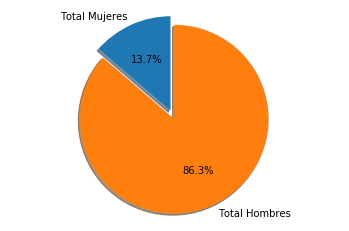

In [66]:
labels = 'Total Mujeres', 'Total Hombres'
sizes = [29.7, 187.25]
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

In [69]:
procedencia_ing_comp[['Total admitidos primer ingreso','Total Públicas','Total Privadas']].describe()

,Total admitidos primer ingreso,Total Públicas,Total Privadas
count,40.000000,40.000000,40.000000
mean,203.300000,184.150000,31.750000
std,26.878835,60.445589,15.501447
min,170.000000,146.000000,16.000000
25%,196.000000,158.500000,23.750000
50%,196.000000,165.500000,28.500000
75%,200.000000,175.250000,35.000000
max,260.000000,426.000000,91.000000


Obtenemos la descripción de los datos correspondiente al promedio de ingreso de estudiantes de escuelas públicas y privadas y graficamos los resultados:

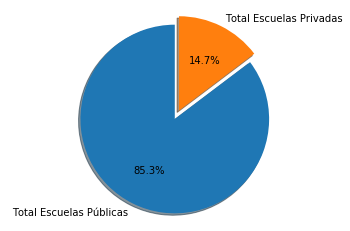

In [70]:
labels = 'Total Escuelas Públicas', 'Total Escuelas Privadas'
sizes = [184.15, 31.75]
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

### Aplicación del modelo de regresión lineal al número de mujeres admitidas a la Licenciatura en Ingeniería en Computación

Vimos que efectivamente el número de mujeres admitidas a la carrera de Licenciatura en Ingeniería en Computación es considerablemente menor al númoro de hombres admitidos. Aplicaremos ahora el modelo de regresión lineal para ver si existe una correlación en el tiempo y el número de mujeres que ingresan a esta carrera.

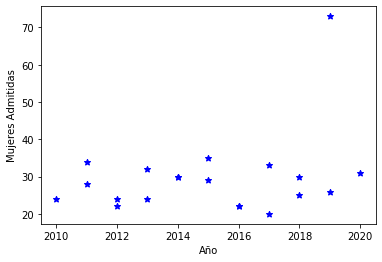

In [71]:
plt.xlabel('Año')
plt.ylabel('Mujeres Admitidas')
plt.scatter(procedencia_ing_comp[['Año']],procedencia_ing_comp[['Total Mujeres']],color='blue', marker='*')

Vemos que en general hay no más de 40 mujeres ingresando a la carrera de Licenciatura en Ingeniería en Computación, salvo un caso de más de 70 en 2019.

Creamos el objeto para el modelo de regresión lineal y entrenamos el modelo:

In [72]:
Reg = linear_model.LinearRegression()
Reg.fit(procedencia_ing_comp[['Año']],procedencia_ing_comp[['Total Mujeres']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
Reg.predict([[2015]])

array([[29.7]])

In [74]:
Reg.coef_

array([[1.10588235]])

In [75]:
Reg.intercept_

array([-2198.65294118])

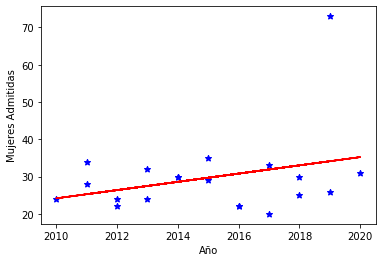

In [77]:
plt.xlabel('Año')
plt.ylabel('Mujeres Admitidas')
plt.scatter(procedencia_ing_comp['Año'],procedencia_ing_comp[['Total Mujeres']],color='blue', marker='*')
plt.plot(procedencia_ing_comp['Año'], Reg.predict(procedencia_ing_comp[['Año']]), color='red')

En este caso vemos que hay una tendencia a la alta. Procederemos a aplicar el modelo entrenado en un conjunto de datos que contienen años futuros para ver el posible comportamiento de ingreso de mujeres a la Licenciatura en Ingeniería en Computación en los próximos años.

In [78]:
predic_anios_df = pd.read_excel("predic_anios.xlsx")
predic_anios_df

,Anio
0,2021
1,2022
2,2023
3,2024
4,2025
5,2026
6,2027
7,2028
8,2029
9,2030


In [79]:
P = Reg.predict(predic_anios_df)

In [80]:
predic_anios_df['Total Mujeres'] = P
predic_anios_df

,Anio,Total Mujeres
0,2021,36.335294
1,2022,37.441176
2,2023,38.547059
3,2024,39.652941
4,2025,40.758824
5,2026,41.864706
6,2027,42.970588
7,2028,44.076471
8,2029,45.182353
9,2030,46.288235


Según el modelo de predicción hay efectivamente una tendencia al alta en el número de mujeres que podrían ingresar a la carrera de Licenciatura en Ingeniería en Computación en los próximos años.

### Análisis de mujeres y hombres admitidos en la Licenciatura en Informática según su procedencia

Analizaremos ahora el total de mujeres y hombres que ingresan a la Licenciatura en Informática según su procedencia.

In [81]:
procedencia_lic_inf = procedencia_full_df.loc[['LICENCIATURA EN INFORMATICA']]

In [82]:
procedencia_lic_inf

,Total admitidos primer ingreso,Extranjeros,Incorporadas UDG,Oficial UDG,Particulares Jalisco,Particulares Zona Metropolitana de Guadalajara,Particulares Otros Estados,Públicas Jalisco,Públicas Zona Metropolitana de Guadalajara,Públicas Otros Estados,...,Públicas Jalisco.1,Públicas Zona Metropolitana de Guadalajara.1,Públicas Otros Estados.1,Sin Referencia.1,Año,Total Mujeres,Total Hombres,Total Públicas,Total Privadas,Total UDG
CARRERA,,,,,,,,,,,,,,,,,,,,,
LICENCIATURA EN INFORMATICA,186,0,3,14,0,3,1,2,2,2,...,4,3,12,0,2018,27,159,158,28,133
LICENCIATURA EN INFORMATICA,186,0,5,25,0,1,0,1,10,1,...,2,25,5,0,2014,43,143,158,28,114
LICENCIATURA EN INFORMATICA,186,0,0,21,0,0,0,1,1,9,...,4,2,24,0,2016,32,154,158,28,117
LICENCIATURA EN INFORMATICA,181,0,4,23,0,2,0,1,8,1,...,3,22,2,0,2012,39,142,163,18,126
LICENCIATURA EN INFORMATICA,186,0,1,20,0,1,0,0,4,2,...,5,29,4,0,2017,28,158,162,24,118
LICENCIATURA EN INFORMATICA,225,0,2,30,0,1,1,2,1,1,...,3,17,8,0,2019,38,187,194,29,162
LICENCIATURA EN INFORMATICA,186,0,1,13,0,2,0,1,6,0,...,5,23,6,0,2015,23,163,155,31,114
LICENCIATURA EN INFORMATICA,170,1,0,32,0,0,0,2,2,3,...,1,15,2,0,2011,40,130,152,16,127
LICENCIATURA EN INFORMATICA,186,0,1,28,0,6,0,3,8,1,...,4,19,4,0,2013,47,139,156,30,117


In [83]:
procedencia_lic_inf[['Total admitidos primer ingreso','Año','Total Mujeres','Total Hombres','Total Públicas','Total Privadas','Total UDG']]

,Total admitidos primer ingreso,Año,Total Mujeres,Total Hombres,Total Públicas,Total Privadas,Total UDG
CARRERA,,,,,,,
LICENCIATURA EN INFORMATICA,186,2018,27,159,158,28,133
LICENCIATURA EN INFORMATICA,186,2014,43,143,158,28,114
LICENCIATURA EN INFORMATICA,186,2016,32,154,158,28,117
LICENCIATURA EN INFORMATICA,181,2012,39,142,163,18,126
LICENCIATURA EN INFORMATICA,186,2017,28,158,162,24,118
LICENCIATURA EN INFORMATICA,225,2019,38,187,194,29,162
LICENCIATURA EN INFORMATICA,186,2015,23,163,155,31,114
LICENCIATURA EN INFORMATICA,170,2011,40,130,152,16,127
LICENCIATURA EN INFORMATICA,186,2013,47,139,156,30,117


In [84]:
procedencia_lic_inf[['Total admitidos primer ingreso','Total Mujeres','Total Hombres']].describe()

,Total admitidos primer ingreso,Total Mujeres,Total Hombres
count,40.000000,40.000000,40.000000
mean,187.350000,35.200000,164.400000
std,13.964332,11.087531,49.239759
min,170.000000,23.000000,125.000000
25%,186.000000,27.000000,142.750000
50%,186.000000,31.500000,158.000000
75%,186.000000,40.750000,160.500000
max,225.000000,70.000000,363.000000


Obtenemos la descripción de los datos y graficamos los resultados

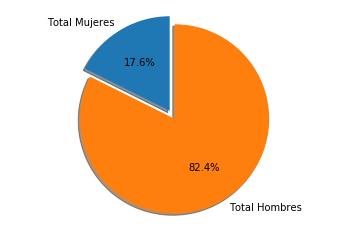

In [85]:
labels = 'Total Mujeres', 'Total Hombres'
sizes = [35.2, 164.4]
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

In [86]:
procedencia_lic_inf[['Total admitidos primer ingreso','Total Públicas','Total Privadas']].describe()

,Total admitidos primer ingreso,Total Públicas,Total Privadas
count,40.000000,40.000000,40.000000
mean,187.350000,173.600000,25.750000
std,13.964332,50.888919,7.102726
min,170.000000,148.000000,16.000000
25%,186.000000,155.750000,20.500000
50%,186.000000,160.000000,25.500000
75%,186.000000,165.500000,28.250000
max,225.000000,386.000000,47.000000


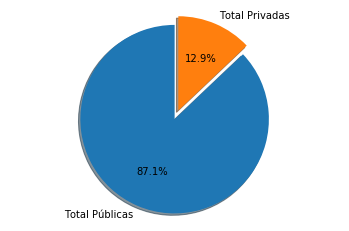

In [87]:
labels = 'Total Públicas', 'Total Privadas'
sizes = [173.6, 25.75]
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

### Aplicación del modelo de regresión lineal al número de mujeres admitidas a la Licenciatura en Informática

Vimos que al igual que en el caso anterior, el número de mujeres admitidas a la carrera de Licenciatura en Informática es considerablemente menor al númoro de hombres admitidos. Aplicaremos ahora el modelo de regresión lineal para ver si existe una correlación en el tiempo y el número de mujeres que ingresan a esta carrera.

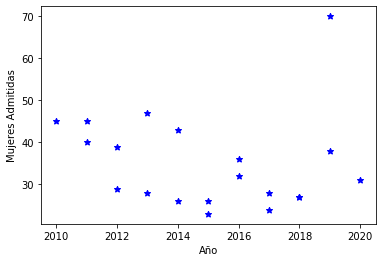

In [88]:
plt.xlabel('Año')
plt.ylabel('Mujeres Admitidas')
plt.scatter(procedencia_lic_inf[['Año']],procedencia_lic_inf[['Total Mujeres']],color='blue', marker='*')

In [89]:
Reg = linear_model.LinearRegression()
Reg.fit(procedencia_lic_inf[['Año']],procedencia_lic_inf[['Total Mujeres']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
Reg.predict([[2015]])

array([[35.2]])

In [91]:
Reg.coef_

array([[-0.39411765]])

In [92]:
Reg.intercept_

array([829.34705882])

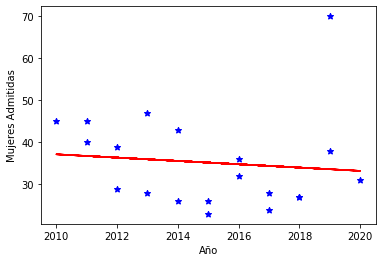

In [93]:
plt.xlabel('Año')
plt.ylabel('Mujeres Admitidas')
plt.scatter(procedencia_lic_inf['Año'],procedencia_lic_inf[['Total Mujeres']],color='blue', marker='*')
plt.plot(procedencia_lic_inf['Año'], Reg.predict(procedencia_lic_inf[['Año']]), color='red')

En este caso vemos que existe una tendencia a la baja, a pesar de haber un caso excepcional en 2019 de un aumento en el ingreso de mujeres a la carrera.

In [95]:
predic_anios_lic_inf_df = pd.read_excel("predic_anios.xlsx")
predic_anios_lic_inf_df

,Anio
0,2021
1,2022
2,2023
3,2024
4,2025
5,2026
6,2027
7,2028
8,2029
9,2030


Aplicaremos el modelo entrenado a los años futuros para observar la tendencia según el modelo.

In [96]:
P = Reg.predict(predic_anios_lic_inf_df)

In [97]:
predic_anios_lic_inf_df['Total Mujeres'] = P
predic_anios_lic_inf_df

,Anio,Total Mujeres
0,2021,32.835294
1,2022,32.441176
2,2023,32.047059
3,2024,31.652941
4,2025,31.258824
5,2026,30.864706
6,2027,30.470588
7,2028,30.076471
8,2029,29.682353
9,2030,29.288235


En el caso de la Licenciatura en Informática vemos que, según el modelo, existe una tendencia a la baja en el número de mujeres que ingresarán a la carrera en los próximos años.